# **Imports**

In [ ]:
# !pip uninstall tf-keras
# !pip install keras-tuner
# !pip install tensorflow==2.16.1

In [5]:
import keras
import tensorflow as tf
print("Keras Current Version:", keras.__version__, "Tensorflow Current Version:", tf.__version__)

Keras Current Version: 3.5.0 Tensorflow Current Version: 2.16.1


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, datasets, metrics

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization, Input


random.seed(32)
np.random.seed(32)
tf.random.set_seed(32)


# **Data Set**

## **Task 1: Load the Cifar 10 Dataset and Examine the Size Information of the Datasets.**

## **Task 1 Solution**

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


In [9]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## **Task 2: How To Represent Target Variable? One-hot Encode? Sparse?**

## **Task 2 Solution**

In [15]:
y_train[0:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

As seen in the previous step, the size information of the target variable came as (50000, 1) for the train data set and (10000, 1) for the test data set. From here, we understand that these target variables are expressed with a single scalar value. For this reason, this is sparse coding. If it was encoded with one-hot encoding; the relevant class should be 1 and the other classes should be 0. For example, [0, 0, 0, 1, 0, 0, 0, 0, 0]. Please review the image below

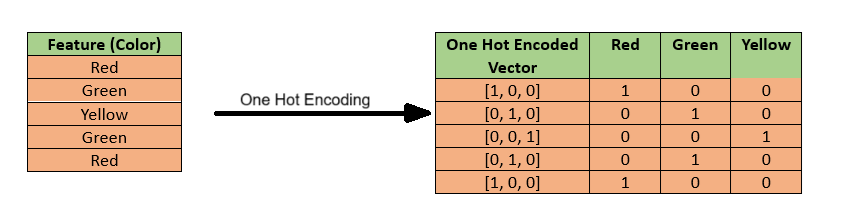

## **Task 3: Show Random Images From the Dataset.**

## **Task 3 Solution**

In [12]:
def show_random_examples(images, labels, num_examples=25, figsize=(14,14)):
  indices = np.random.choice(len(images), num_examples, replace=False)
  plt.Figure(figsize=figsize)
  for i, idx in enumerate(indices):
    plt.subplot(5, 5, i+1)
    plt.xticks( [] )
    plt.yticks( [] )
    plt.grid(False)
    plt.imshow(images[idx], cmap='gray')
    plt.xlabel(labels[idx])
  plt.show()

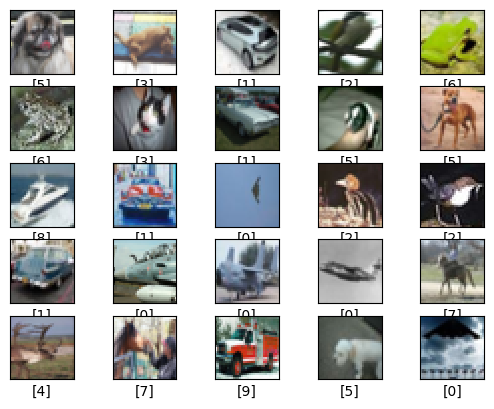

In [13]:
show_random_examples(X_train, y_train)

# **Data Preparation**

## **Task 4: Standardize the Dataset.**

## **Task 4 Solution**

In [14]:
X_train, X_test = X_train / 255.0, X_test / 255.0

## **Task 5: Create Tensorflow Dataset.**

## **Task 5 Solution**

In [17]:
def prepare_datasets(X_train, X_val, y_train, y_val, batch_size=None):
    if batch_size is None:
        batch_size = len(X_train)
    train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
    train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
    val_dataset = val_dataset.batch(batch_size)
    return train_dataset, val_dataset

train_ds, val_ds = prepare_datasets(X_train, X_test, y_train, y_test, batch_size=32)

# **Model**

## **Task 6: Create the Model Structure.**

You can create the model structure as you wish.

Our main goal is to exceed 70 percent accuracy.

You can add as many convolution layers (Conv2D) as you want.

You can enter as many neurons as you want in these layers.

You can enter 3 layers separately or you can create blocks, that is, you can add 2 convolution layers one after the other, then do max pooling and then add, for example, 2 more convolution layers one after the other.

You can also do trial and error as you wish in fully connected layers.

You can also add any other layers you want.

I wonder who can get above 70 the most!

## **Task 6 Solution**

In [24]:
model = Sequential([
    Input(shape=(32,32, 3)),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    Dropout(0.3),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

## **Task 7: Compile the Model.**

## **Task 7 Solution**

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

## **Task 8: Define Callback Structures.**

## **Task 8 Solution**

In [26]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=20,
                               verbose=1)

model_checkpoint = ModelCheckpoint(filepath='cifar10_model.keras',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   save_weights_only=False,
                                   verbose=1)

## **Task 9: Train the Model.**

## **Task 9 Solution**

In [27]:
history = model.fit(train_ds,
                    epochs=1000,
                    validation_data=val_ds,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/1000
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 2.3027 - sparse_categorical_accuracy: 0.2201
Epoch 1: val_loss improved from inf to 1.51082, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 58ms/step - loss: 2.3023 - sparse_categorical_accuracy: 0.2202 - val_loss: 1.5108 - val_sparse_categorical_accuracy: 0.4594
Epoch 2/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.5194 - sparse_categorical_accuracy: 0.4414
Epoch 2: val_loss did not improve from 1.51082
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - loss: 1.5193 - sparse_categorical_accuracy: 0.4414 - val_loss: 1.5165 - val_sparse_categorical_accuracy: 0.4565
Epoch 3/1000
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1.3496 - sparse_categorical_accuracy: 0.5172
Epoch 3: val_loss improved from 1.51082 to 1.31619, saving model to cifar10_model.keras
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 57ms/step - loss: 1.3495 - sparse_categorical_accuracy: 0.5172 - val_loss: 1.3162 - val_sparse_ca

## **Task 10: Evaluate Model Performance.**

## **Task 10 Solution**

In [28]:
val_loss, sparse_categorical_accuracy = model.evaluate(val_ds, verbose=0)
print(f"Loss: {val_loss}")
print(f"Accuracy: {sparse_categorical_accuracy}")


Loss: 0.5880609154701233
Accuracy: 0.7980999946594238


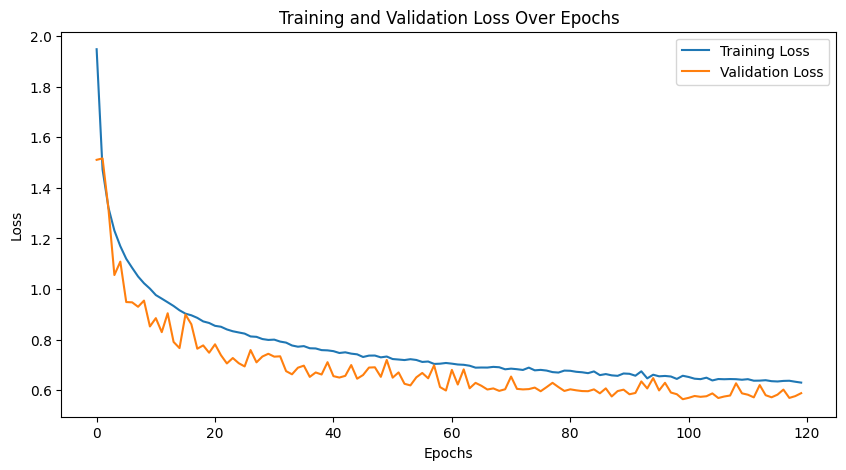

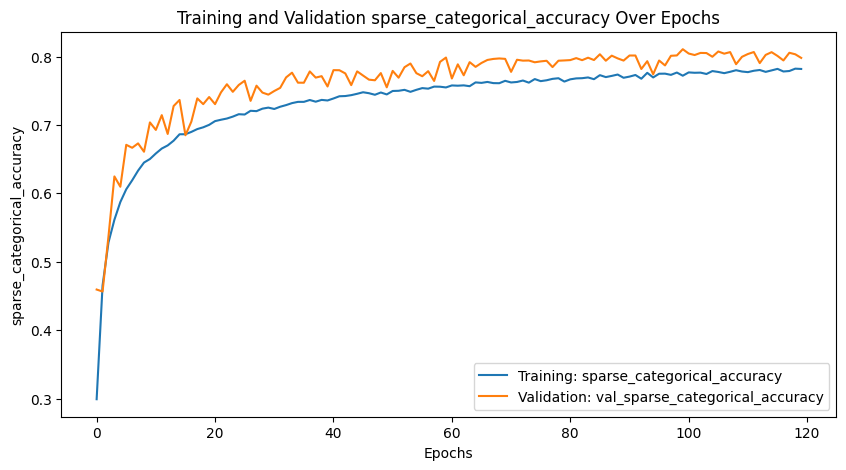

In [29]:
def plot_training_history(history, train_loss='loss', train_metric='accuracy', val_loss='val_loss', val_metric='val_accuracy'):
    # Loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_loss], label='Training Loss')
    plt.plot(history.history[val_loss], label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Metrics
    plt.figure(figsize=(10, 5))
    plt.plot(history.history[train_metric], label=f"Training: {train_metric}")
    plt.plot(history.history[val_metric], label=f"Validation: {val_metric}")
    plt.title(f'Training and Validation {train_metric} Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel(f'{train_metric}')
    plt.legend()
    plt.show()

plot_training_history(history, train_loss='loss', train_metric='sparse_categorical_accuracy', val_loss='val_loss', val_metric='val_sparse_categorical_accuracy')

